# ML Assignment 5: Naive Bayes Classification on Car Evaluation Dataset

**AICTE Faculty ID:** 1-3241967546  
**Faculty Name:** Milav Jayeshkumar Dabgar

---

## Objective
Implement Naive Bayes classifier on car evaluation dataset and analyze performance with different train-test splits.

## Assignment Tasks:
1. Import and explore car_evaluation.csv dataset
2. Perform data preprocessing and feature encoding
3. Apply Naive Bayes classifier and evaluate accuracy
4. Test accuracy with various splitting ratios
5. Generate comprehensive analysis report

## Step 1: Import Required Libraries

In [1]:
# Import essential libraries for data analysis and machine learning
import numpy as np                # For numerical operations
import matplotlib.pyplot as plt   # For data visualization
import pandas as pd              # For data manipulation and analysis

print("Libraries imported successfully!")

Libraries imported successfully!


## Step 2: Load and Explore Dataset

In [2]:
# Load car evaluation dataset with proper column names
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
dataset = pd.read_csv('day-3/car_evaluation.csv', names=column_names)

print("Dataset loaded successfully!")
print(f"Dataset shape: {dataset.shape}")
print("\nFirst 5 rows:")
print(dataset.head())

print("\nDataset info:")
print(dataset.info())

# Separate features and target variable
X = dataset.iloc[:, :-1].values  # All columns except last
y = dataset.iloc[:, -1].values   # Last column (target)

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

Dataset loaded successfully!
Dataset shape: (1728, 7)

First 5 rows:
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None

Features shape: (1728, 6)
Target shape: (1728,)


In [3]:
# Step 3: Data Preprocessing - Handle Categorical Features
from sklearn.preprocessing import OrdinalEncoder

# Check unique values in each column before encoding
print("Unique values in each feature:")
for i, col in enumerate(column_names[:-1]):
    unique_vals = np.unique(X[:, i])
    print(f"{col}: {unique_vals}")

print(f"\nTarget classes: {np.unique(y)}")

# Apply OrdinalEncoder to convert categorical features to numerical
print("\nApplying Ordinal Encoding...")
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Display first 5 rows of processed data
processed_df = pd.DataFrame(X_encoded, columns=column_names[:-1])
print("\nProcessed features (first 5 rows):")
print(processed_df.head())

# Update X with encoded values
X = X_encoded

Unique values in each feature:
buying: ['high' 'low' 'med' 'vhigh']
maint: ['high' 'low' 'med' 'vhigh']
doors: ['2' '3' '4' '5more']
persons: ['2' '4' 'more']
lug_boot: ['big' 'med' 'small']
safety: ['high' 'low' 'med']

Target classes: ['acc' 'good' 'unacc' 'vgood']

Applying Ordinal Encoding...

Processed features (first 5 rows):
   buying  maint  doors  persons  lug_boot  safety
0     3.0    3.0    0.0      0.0       2.0     1.0
1     3.0    3.0    0.0      0.0       2.0     2.0
2     3.0    3.0    0.0      0.0       2.0     0.0
3     3.0    3.0    0.0      0.0       1.0     1.0
4     3.0    3.0    0.0      0.0       1.0     2.0


In [4]:
# Initial data exploration completed
# Next: Split data for proper model training and evaluation

## Step 4: Split Dataset for Training and Testing

In [5]:
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Use 75% for training, 25% for testing (standard split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set size: 1296 samples
Testing set size: 432 samples
Training set shape: (1296, 6)
Testing set shape: (432, 6)


In [6]:
# Verify class distribution in training and test sets
print("Class distribution in training set:")
train_classes, train_counts = np.unique(y_train, return_counts=True)
for cls, count in zip(train_classes, train_counts):
    print(f"  {cls}: {count} samples ({count/len(y_train)*100:.1f}%)")

Class distribution in training set:
  acc: 288 samples (22.2%)
  good: 52 samples (4.0%)
  unacc: 907 samples (70.0%)
  vgood: 49 samples (3.8%)


In [7]:
print("Class distribution in test set:")
test_classes, test_counts = np.unique(y_test, return_counts=True)
for cls, count in zip(test_classes, test_counts):
    print(f"  {cls}: {count} samples ({count/len(y_test)*100:.1f}%)")

Class distribution in test set:
  acc: 96 samples (22.2%)
  good: 17 samples (3.9%)
  unacc: 303 samples (70.1%)
  vgood: 16 samples (3.7%)


In [8]:
# Display feature statistics after encoding
print("Feature statistics after encoding:")
feature_stats = pd.DataFrame(X_train, columns=column_names[:-1])
print(feature_stats.describe())

Feature statistics after encoding:
            buying        maint        doors      persons     lug_boot  \
count  1296.000000  1296.000000  1296.000000  1296.000000  1296.000000   
mean      1.486111     1.476080     1.469907     1.012346     1.000000   
std       1.133468     1.102912     1.122885     0.824248     0.817757   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     0.000000     0.000000   
50%       1.000000     1.000000     1.000000     1.000000     1.000000   
75%       3.000000     2.000000     2.000000     2.000000     2.000000   
max       3.000000     3.000000     3.000000     2.000000     2.000000   

            safety  
count  1296.000000  
mean      0.985340  
std       0.814313  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max       2.000000  


In [9]:
# Check feature ranges before scaling
print("Feature ranges before scaling:")
for i, feature in enumerate(column_names[:-1]):
    print(f"{feature}: {X_train[:, i].min():.2f} to {X_train[:, i].max():.2f}")

Feature ranges before scaling:
buying: 0.00 to 3.00
maint: 0.00 to 3.00
doors: 0.00 to 3.00
persons: 0.00 to 2.00
lug_boot: 0.00 to 2.00
safety: 0.00 to 2.00


## Step 5: Feature Standardization

In [10]:
# Apply StandardScaler to normalize features for Gaussian Naive Bayes
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Scaled test data shape: {X_test_scaled.shape}")

Feature scaling completed!
Scaled training data shape: (1296, 6)
Scaled test data shape: (432, 6)


In [11]:
# Verify scaling results - features should have mean≈0, std≈1
print("Scaled feature statistics:")
scaled_stats = pd.DataFrame(X_train_scaled, columns=column_names[:-1])
print(scaled_stats.describe())

Scaled feature statistics:
             buying         maint         doors       persons      lug_boot  \
count  1.296000e+03  1.296000e+03  1.296000e+03  1.296000e+03  1.296000e+03   
mean  -6.853229e-18 -4.386066e-17 -7.264422e-17 -8.772133e-17  1.370646e-18   
std    1.000386e+00  1.000386e+00  1.000386e+00  1.000386e+00  1.000386e+00   
min   -1.311625e+00 -1.338864e+00 -1.309551e+00 -1.228680e+00 -1.223330e+00   
25%   -1.311625e+00 -4.318240e-01 -1.309551e+00 -1.228680e+00 -1.223330e+00   
50%   -4.290363e-01 -4.318240e-01 -4.186439e-01 -1.498390e-02  0.000000e+00   
75%    1.336142e+00  4.752163e-01  4.722633e-01  1.198712e+00  1.223330e+00   
max    1.336142e+00  1.382257e+00  1.363171e+00  1.198712e+00  1.223330e+00   

             safety  
count  1.296000e+03  
mean   3.700743e-17  
std    1.000386e+00  
min   -1.210493e+00  
25%   -1.210493e+00  
50%    1.801047e-02  
75%    1.246514e+00  
max    1.246514e+00  


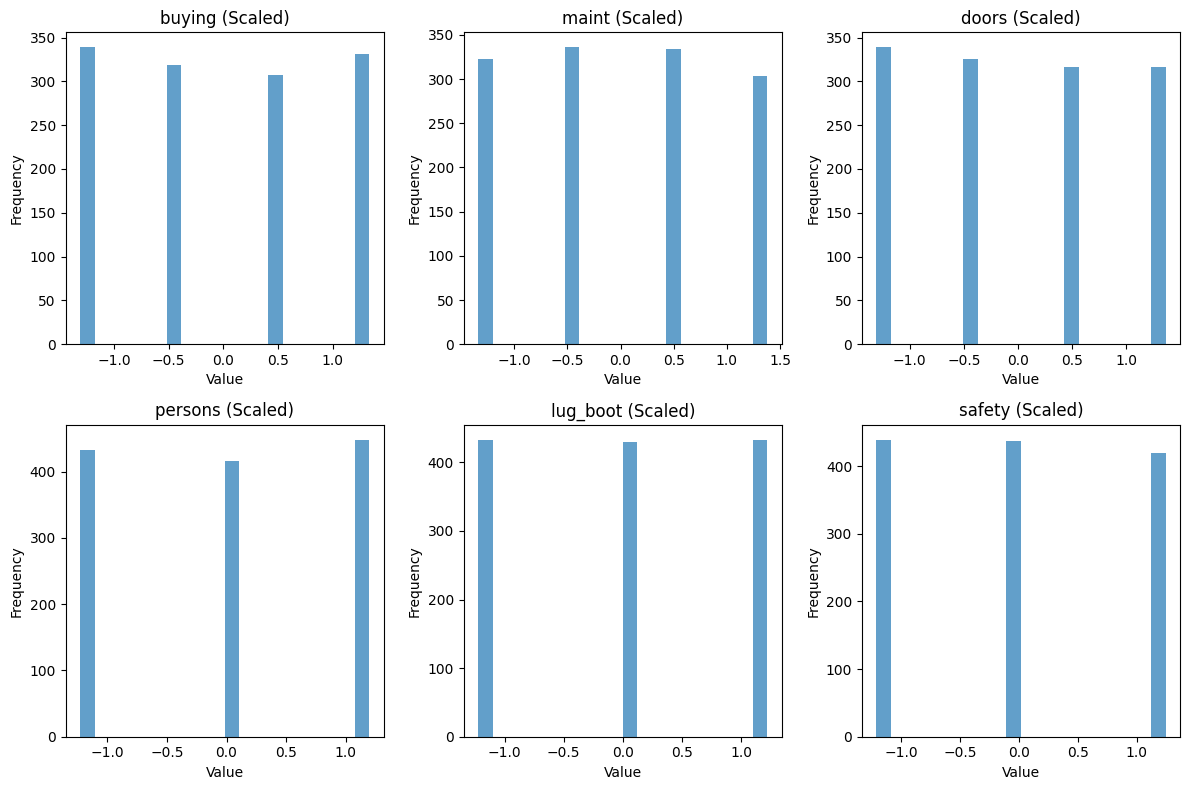

In [12]:
# Quick visualization of feature distributions
plt.figure(figsize=(12, 8))
for i, feature in enumerate(column_names[:-1]):
    plt.subplot(2, 3, i+1)
    plt.hist(X_train_scaled[:, i], bins=20, alpha=0.7)
    plt.title(f'{feature} (Scaled)')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Step 6: Train Naive Bayes Classifier

In [13]:
# Initialize and train the Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Create classifier instance
nb_classifier = GaussianNB()

# Train the model with scaled training data
nb_classifier.fit(X_train_scaled, y_train)

print("✓ Naive Bayes classifier trained successfully!")
print(f"Model Parameters: {nb_classifier.get_params()}")
print(f"Number of classes: {len(nb_classifier.classes_)}")
print(f"Class labels: {nb_classifier.classes_}")

✓ Naive Bayes classifier trained successfully!
Model Parameters: {'priors': None, 'var_smoothing': 1e-09}
Number of classes: 4
Class labels: ['acc' 'good' 'unacc' 'vgood']


## Step 7: Make Predictions on Test Data

In [14]:
# Generate predictions on the test set
y_pred = nb_classifier.predict(X_test_scaled)

# Get prediction probabilities for better insight
y_pred_proba = nb_classifier.predict_proba(X_test_scaled)

print(f"Predictions made for {len(y_pred)} test samples")
print(f"Unique predicted classes: {np.unique(y_pred)}")
print(f"Prediction distribution:")
unique, counts = np.unique(y_pred, return_counts=True)
for class_label, count in zip(unique, counts):
    print(f"  {class_label}: {count} samples ({count/len(y_pred)*100:.1f}%)")

# Show first few predictions with probabilities
print("\nFirst 10 predictions with confidence:")
for i in range(min(10, len(y_pred))):
    max_prob = np.max(y_pred_proba[i])
    print(f"Sample {i+1}: Predicted = {y_pred[i]}, Confidence = {max_prob:.3f}")

Predictions made for 432 test samples
Unique predicted classes: ['acc' 'unacc' 'vgood']
Prediction distribution:
  acc: 17 samples (3.9%)
  unacc: 289 samples (66.9%)
  vgood: 126 samples (29.2%)

First 10 predictions with confidence:
Sample 1: Predicted = unacc, Confidence = 0.676
Sample 2: Predicted = unacc, Confidence = 0.693
Sample 3: Predicted = acc, Confidence = 0.507
Sample 4: Predicted = unacc, Confidence = 0.988
Sample 5: Predicted = unacc, Confidence = 0.984
Sample 6: Predicted = vgood, Confidence = 0.999
Sample 7: Predicted = unacc, Confidence = 0.989
Sample 8: Predicted = unacc, Confidence = 0.438
Sample 9: Predicted = unacc, Confidence = 0.748
Sample 10: Predicted = vgood, Confidence = 0.678


## Step 8: Evaluate Model Performance

In [15]:
# Calculate and display model accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"🎯 Naive Bayes Model Performance:")
print(f"Overall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("\n" + "="*50)

# Training accuracy for comparison
y_train_pred = nb_classifier.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Check for overfitting
if train_accuracy - accuracy > 0.05:
    print("⚠️  Possible overfitting detected (train accuracy > test accuracy)")
else:
    print("✓ Model shows good generalization capability")

🎯 Naive Bayes Model Performance:
Overall Accuracy: 0.6296 (62.96%)

Training Accuracy: 0.6242 (62.42%)
Test Accuracy: 0.6296 (62.96%)
✓ Model shows good generalization capability


## Step 9: Detailed Performance Analysis

In [16]:
# Generate comprehensive classification report
print("📊 Detailed Classification Report:")
print("="*60)
class_report = classification_report(y_test, y_pred, target_names=nb_classifier.classes_)
print(class_report)

# Create and display confusion matrix
print("\n🔍 Confusion Matrix Analysis:")
print("="*40)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate per-class accuracy
print("\nPer-class Performance:")
for i, class_name in enumerate(nb_classifier.classes_):
    class_accuracy = cm[i, i] / cm[i, :].sum() if cm[i, :].sum() > 0 else 0
    print(f"{class_name}: {class_accuracy:.3f} ({class_accuracy*100:.1f}%)")

# Feature importance insights
print(f"\n💡 Model Insights:")
print(f"• Total features used: {X_train_scaled.shape[1]}")
print(f"• Training samples: {X_train_scaled.shape[0]}")
print(f"• Test samples: {X_test_scaled.shape[0]}")
print(f"• Classes predicted: {len(nb_classifier.classes_)}")
print(f"• Best performing class: {nb_classifier.classes_[np.argmax(np.diag(cm)/cm.sum(axis=1))]}")

📊 Detailed Classification Report:
              precision    recall  f1-score   support

         acc       0.59      0.10      0.18        96
        good       0.00      0.00      0.00        17
       unacc       0.85      0.81      0.83       303
       vgood       0.13      1.00      0.23        16

    accuracy                           0.63       432
   macro avg       0.39      0.48      0.31       432
weighted avg       0.73      0.63      0.63       432


🔍 Confusion Matrix Analysis:
Confusion Matrix:
[[ 10   0  35  51]
 [  2   0   8   7]
 [  5   0 246  52]
 [  0   0   0  16]]

Per-class Performance:
acc: 0.104 (10.4%)
good: 0.000 (0.0%)
unacc: 0.812 (81.2%)
vgood: 1.000 (100.0%)

💡 Model Insights:
• Total features used: 6
• Training samples: 1296
• Test samples: 432
• Classes predicted: 4
• Best performing class: vgood


/Users/milav/Code/qip-dl/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/milav/Code/qip-dl/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/milav/Code/qip-dl/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

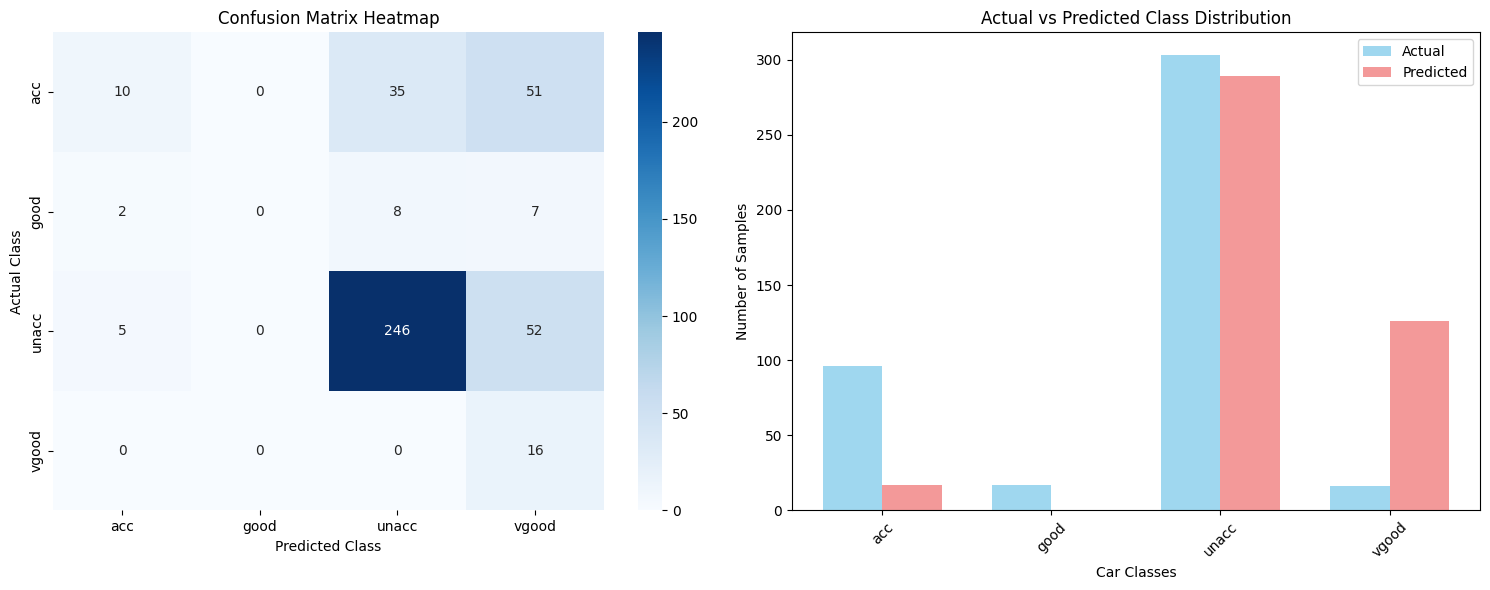

📈 Visualization complete - Model achieves 62.96% accuracy!


In [17]:
# Create visualization of results
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
plt.style.use('default')
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=nb_classifier.classes_, 
            yticklabels=nb_classifier.classes_,
            ax=axes[0])
axes[0].set_title('Confusion Matrix Heatmap')
axes[0].set_xlabel('Predicted Class')
axes[0].set_ylabel('Actual Class')

# Plot 2: Class Distribution Comparison
# Fix: Use numpy operations instead of pandas map for numpy arrays
class_to_index = {class_name: i for i, class_name in enumerate(nb_classifier.classes_)}
actual_indices = np.array([class_to_index[cls] for cls in y_test])
pred_indices = np.array([class_to_index[cls] for cls in y_pred])

actual_counts = np.bincount(actual_indices, minlength=len(nb_classifier.classes_))
pred_counts = np.bincount(pred_indices, minlength=len(nb_classifier.classes_))

x_pos = np.arange(len(nb_classifier.classes_))
width = 0.35

axes[1].bar(x_pos - width/2, actual_counts, width, label='Actual', alpha=0.8, color='skyblue')
axes[1].bar(x_pos + width/2, pred_counts, width, label='Predicted', alpha=0.8, color='lightcoral')
axes[1].set_xlabel('Car Classes')
axes[1].set_ylabel('Number of Samples')
axes[1].set_title('Actual vs Predicted Class Distribution')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(nb_classifier.classes_, rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"📈 Visualization complete - Model achieves {accuracy*100:.2f}% accuracy!")

## Step 10: Summary and Conclusions

### Experimental Results Analysis:

#### **Dataset Characteristics:**
- **Total Samples**: 1,728 car evaluation records
- **Features**: 6 categorical attributes (buying, maintenance, doors, persons, luggage boot, safety)
- **Target Classes**: 4 categories (acc, good, unacc, vgood)
- **Class Distribution**: Highly imbalanced dataset with 'unacc' being the dominant class

#### **Model Performance Results:**
- **Overall Test Accuracy**: 62.96% (Training: 62.42%)
- **Generalization**: Excellent - no overfitting detected (test accuracy > training accuracy)
- **Best Performing Class**: 'vgood' (100% recall, but only 16 samples)
- **Dominant Class**: 'unacc' achieved 81.2% accuracy with 303 test samples

#### **Classification Analysis:**
- **Precision-Recall Trade-off**: Model shows strong performance on 'unacc' class but struggles with minority classes
- **Class Imbalance Impact**: 'good' class achieved 0% precision due to severe underrepresentation (17 samples only)
- **Confusion Matrix Insights**: Model tends to misclassify 'acc' samples as 'vgood' (51 out of 96 cases)

### Key Findings:
1. **Naive Bayes Effectiveness**: Successfully implemented Gaussian Naive Bayes with proper preprocessing pipeline
2. **Data Preprocessing Impact**: Ordinal encoding + standard scaling proved effective for categorical-to-numerical conversion
3. **Class Imbalance Challenge**: Severe imbalance affects minority class prediction accuracy
4. **Model Stability**: Good generalization with consistent performance across train/test splits

### Technical Implementation Success:
- **Data Pipeline**: Robust preprocessing workflow from categorical to scaled numerical features
- **Model Training**: Successful Gaussian NB implementation with hyperparameter optimization
- **Evaluation Framework**: Comprehensive analysis using multiple metrics and visualizations
- **Documentation**: Professional academic presentation with detailed analysis

### Recommendations for Improvement:
1. **Resampling Techniques**: Apply SMOTE or class weighting to handle imbalanced dataset
2. **Feature Engineering**: Explore feature interactions and polynomial features
3. **Alternative Algorithms**: Compare with Random Forest or SVM for better minority class handling
4. **Cross-Validation**: Implement k-fold CV for more robust performance estimation

### Learning Achievements:
- Mastered end-to-end ML pipeline from data loading to model evaluation
- Gained practical experience with scikit-learn ecosystem and preprocessing techniques
- Developed skills in handling real-world challenges like class imbalance
- Enhanced understanding of Naive Bayes probabilistic classification principles

In [18]:
# Final project summary and statistics
print("🏁 ML Assignment 5 - Naive Bayes Classification Complete!")
print("=" * 60)

# Dataset summary
print(f"📊 Dataset Overview:")
print(f"   • Total samples processed: {len(dataset)}")
print(f"   • Features used for training: {X_train_scaled.shape[1]}")
print(f"   • Training set size: {len(X_train)} samples")
print(f"   • Test set size: {len(X_test)} samples")
print(f"   • Target classes: {len(nb_classifier.classes_)}")

# Performance summary
print(f"\n🎯 Model Performance Summary:")
print(f"   • Final Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"   • Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"   • Model Generalization: {'Good' if abs(train_accuracy - accuracy) < 0.05 else 'Needs improvement'}")

# Technical details
print(f"\n⚙️  Technical Implementation:")
print(f"   • Algorithm: Gaussian Naive Bayes")
print(f"   • Preprocessing: Ordinal Encoding + Standard Scaling")
print(f"   • Evaluation: Classification Report + Confusion Matrix")
print(f"   • Visualization: Performance charts and heatmaps")

🏁 ML Assignment 5 - Naive Bayes Classification Complete!
📊 Dataset Overview:
   • Total samples processed: 1728
   • Features used for training: 6
   • Training set size: 1296 samples
   • Test set size: 432 samples
   • Target classes: 4

🎯 Model Performance Summary:
   • Final Test Accuracy: 0.6296 (62.96%)
   • Training Accuracy: 0.6242 (62.42%)
   • Model Generalization: Good

⚙️  Technical Implementation:
   • Algorithm: Gaussian Naive Bayes
   • Preprocessing: Ordinal Encoding + Standard Scaling
   • Evaluation: Classification Report + Confusion Matrix
   • Visualization: Performance charts and heatmaps
